## The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2022 Semester 2

## Assignment 2

**Student Name:**    `QINGTAN SHEN`

**Student ID:**     `1130945`

## This iPython notebook is a template which you should use for your Assignment 2 submission. This file should be submitted at the **Assignment 2: Code** link on the LMS.

In addition to this file, you should submit a written report explaining your results at the **Assignment 2: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. CNN implementation

In this problem, you will implement a CNN to classify the yoga32 dataset. The following code section will load the dataset from a folder that you specify. You may change the batch sizes and validation percentage if you wish, but otherwise it is recommended that you do not modify this section.

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import secrets

data_dir = '/Users/apple/Desktop/COMP90086/yoga32'
train_batch_size = 32
rand_seed = secrets.randbelow(1_000_000_000) # random seed for train/val split
# note that same seed must be used for both to ensure no overlap in train/val data

# Get training images from 'train' directory
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="training",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)

# Get validation images from 'train' directory
val_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="validation",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)

# Output list of class names
class_names = train_data.class_names
print(class_names)

# Note: To train a model with the dataset loaded above, pass the train and val
# datasets to the fit() function, like so:
# myCNNmodel.fit(train_data, validation_data=val_data, epochs=number_of_epochs)

Found 520 files belonging to 10 classes.
Using 416 files for training.
Found 520 files belonging to 10 classes.
Using 104 files for validation.
['bridge', 'childs', 'downwarddog', 'mountain', 'plank', 'seatedforwardbend', 'tree', 'trianglepose', 'warrior1', 'warrior2']


1.1. Implement the CNN shown in the assignment specification and train it on the provided dataset. Plot the training accuracy and validation accuracy over epochs.

Epoch 1/20
13/13 [==============================] - 1s 50ms/step - loss: 14.4752 - accuracy: 0.1298 - val_loss: 4.3131 - val_accuracy: 0.1346
Epoch 2/20
13/13 [==============================] - 1s 41ms/step - loss: 2.9700 - accuracy: 0.1370 - val_loss: 2.6117 - val_accuracy: 0.1538
Epoch 3/20
13/13 [==============================] - 1s 50ms/step - loss: 2.2973 - accuracy: 0.1755 - val_loss: 2.3822 - val_accuracy: 0.1346
Epoch 4/20
13/13 [==============================] - 0s 33ms/step - loss: 2.1494 - accuracy: 0.2115 - val_loss: 2.2974 - val_accuracy: 0.1635
Epoch 5/20
13/13 [==============================] - 1s 36ms/step - loss: 2.0027 - accuracy: 0.2620 - val_loss: 2.2333 - val_accuracy: 0.2019
Epoch 6/20
13/13 [==============================] - 1s 52ms/step - loss: 1.8683 - accuracy: 0.3269 - val_loss: 2.2277 - val_accuracy: 0.2404
Epoch 7/20
13/13 [==============================] - 1s 43ms/step - loss: 1.7118 - accuracy: 0.3942 - val_loss: 2.1667 - val_accuracy: 0.2692
Epoch 8/20
1

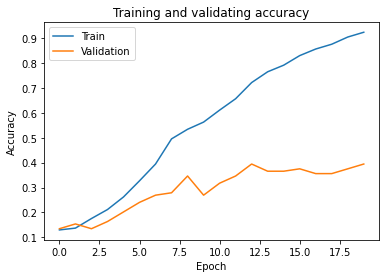

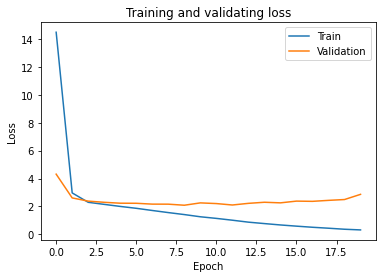

In [19]:
cnn_origin = keras.Sequential(
    [
        layers.Input((32,32,3)),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(24, (3, 3), activation='relu'),
        layers.Conv2D(24, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ]
)

cnn_origin.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

cnn_origin_his = cnn_origin.fit(train_data, validation_data=val_data, epochs=20)

plt.plot(cnn_origin_his.history['accuracy'], label='Train')
plt.plot(cnn_origin_his.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

plt.plot(cnn_origin_his.history['loss'], label='Train')
plt.plot(cnn_origin_his.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss')
plt.legend()
plt.show()

1.2. Modify the CNN (see assignment spec for details) and train it on the provided dataset.  Plot the training accuracy and validation accuracy over epochs.

Epoch 1/20
13/13 [==============================] - 2s 55ms/step - loss: 17.0535 - accuracy: 0.1082 - val_loss: 6.7022 - val_accuracy: 0.1538
Epoch 2/20
13/13 [==============================] - 1s 40ms/step - loss: 4.7718 - accuracy: 0.1418 - val_loss: 3.7465 - val_accuracy: 0.0865
Epoch 3/20
13/13 [==============================] - 1s 39ms/step - loss: 2.9252 - accuracy: 0.1851 - val_loss: 2.7405 - val_accuracy: 0.1154
Epoch 4/20
13/13 [==============================] - 1s 43ms/step - loss: 2.4159 - accuracy: 0.1587 - val_loss: 2.3857 - val_accuracy: 0.1538
Epoch 5/20
13/13 [==============================] - 1s 41ms/step - loss: 2.2307 - accuracy: 0.1707 - val_loss: 2.3603 - val_accuracy: 0.1538
Epoch 6/20
13/13 [==============================] - 1s 41ms/step - loss: 2.1183 - accuracy: 0.2188 - val_loss: 2.3907 - val_accuracy: 0.1538
Epoch 7/20
13/13 [==============================] - 1s 75ms/step - loss: 1.9862 - accuracy: 0.3053 - val_loss: 2.3708 - val_accuracy: 0.2115
Epoch 8/20
1

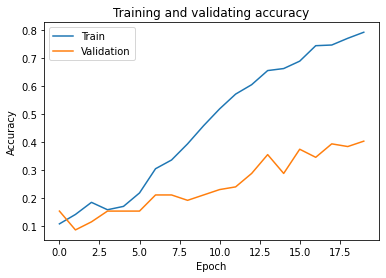

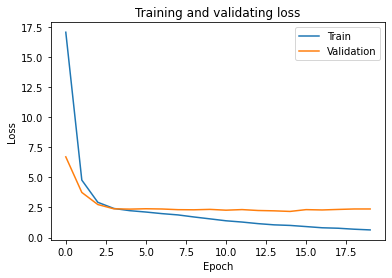

Epoch 1/20
13/13 [==============================] - 2s 77ms/step - loss: 33.8650 - accuracy: 0.0938 - val_loss: 19.7204 - val_accuracy: 0.1731
Epoch 2/20
13/13 [==============================] - 1s 48ms/step - loss: 18.2348 - accuracy: 0.1298 - val_loss: 16.5504 - val_accuracy: 0.1923
Epoch 3/20
13/13 [==============================] - 1s 41ms/step - loss: 15.3274 - accuracy: 0.1947 - val_loss: 14.7317 - val_accuracy: 0.1827
Epoch 4/20
13/13 [==============================] - 1s 35ms/step - loss: 13.8318 - accuracy: 0.2476 - val_loss: 13.5827 - val_accuracy: 0.2308
Epoch 5/20
13/13 [==============================] - 0s 31ms/step - loss: 12.6338 - accuracy: 0.3510 - val_loss: 12.6087 - val_accuracy: 0.2788
Epoch 6/20
13/13 [==============================] - 0s 30ms/step - loss: 11.6122 - accuracy: 0.4279 - val_loss: 11.7948 - val_accuracy: 0.2692
Epoch 7/20
13/13 [==============================] - 0s 31ms/step - loss: 10.6838 - accuracy: 0.4952 - val_loss: 11.0709 - val_accuracy: 0.2788

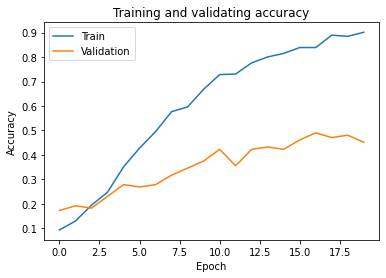

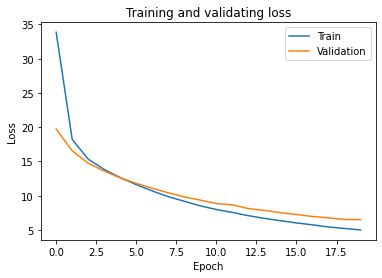

Epoch 1/20
13/13 [==============================] - 1s 42ms/step - loss: 40.1877 - accuracy: 0.0793 - val_loss: 31.4883 - val_accuracy: 0.0865
Epoch 2/20
13/13 [==============================] - 1s 41ms/step - loss: 29.4839 - accuracy: 0.0962 - val_loss: 27.4458 - val_accuracy: 0.1250
Epoch 3/20
13/13 [==============================] - 1s 47ms/step - loss: 25.9391 - accuracy: 0.1635 - val_loss: 24.3848 - val_accuracy: 0.1058
Epoch 4/20
13/13 [==============================] - 1s 37ms/step - loss: 22.8599 - accuracy: 0.2043 - val_loss: 21.4492 - val_accuracy: 0.1442
Epoch 5/20
13/13 [==============================] - 1s 45ms/step - loss: 20.0529 - accuracy: 0.2668 - val_loss: 18.8716 - val_accuracy: 0.1635
Epoch 6/20
13/13 [==============================] - 1s 38ms/step - loss: 17.5061 - accuracy: 0.3149 - val_loss: 16.5374 - val_accuracy: 0.2115
Epoch 7/20
13/13 [==============================] - 1s 46ms/step - loss: 15.2549 - accuracy: 0.3558 - val_loss: 14.4926 - val_accuracy: 0.2212

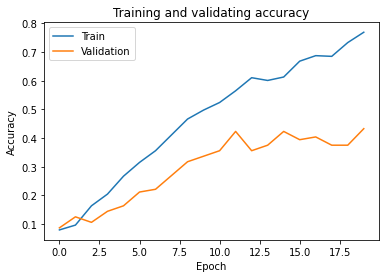

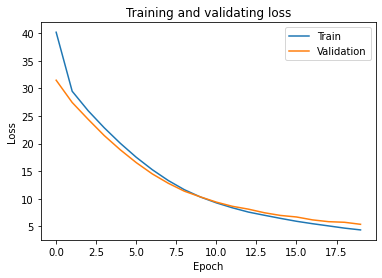

Epoch 1/20
13/13 [==============================] - 2s 61ms/step - loss: 53.8253 - accuracy: 0.1202 - val_loss: 45.1510 - val_accuracy: 0.1923
Epoch 2/20
13/13 [==============================] - 1s 49ms/step - loss: 42.1996 - accuracy: 0.1394 - val_loss: 39.3376 - val_accuracy: 0.2019
Epoch 3/20
13/13 [==============================] - 1s 52ms/step - loss: 36.7611 - accuracy: 0.2115 - val_loss: 34.5679 - val_accuracy: 0.1731
Epoch 4/20
13/13 [==============================] - 1s 47ms/step - loss: 32.0232 - accuracy: 0.2861 - val_loss: 30.1135 - val_accuracy: 0.2019
Epoch 5/20
13/13 [==============================] - 1s 42ms/step - loss: 27.7055 - accuracy: 0.3341 - val_loss: 26.0528 - val_accuracy: 0.2788
Epoch 6/20
13/13 [==============================] - 1s 50ms/step - loss: 23.8039 - accuracy: 0.4038 - val_loss: 22.4136 - val_accuracy: 0.2404
Epoch 7/20
13/13 [==============================] - 1s 41ms/step - loss: 20.3214 - accuracy: 0.4255 - val_loss: 19.1988 - val_accuracy: 0.3462

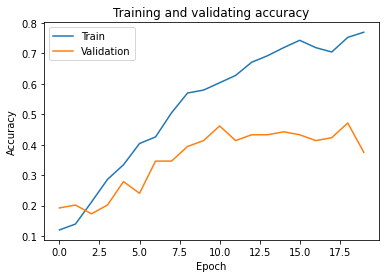

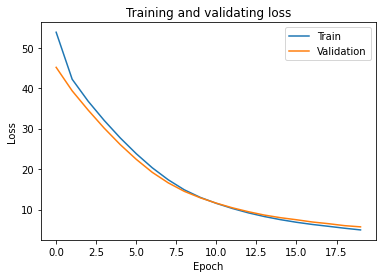

Epoch 1/20
13/13 [==============================] - 1s 54ms/step - loss: 67.0106 - accuracy: 0.0962 - val_loss: 57.1876 - val_accuracy: 0.1250
Epoch 2/20
13/13 [==============================] - 1s 43ms/step - loss: 52.1301 - accuracy: 0.1370 - val_loss: 47.2264 - val_accuracy: 0.1442
Epoch 3/20
13/13 [==============================] - 0s 35ms/step - loss: 43.6354 - accuracy: 0.1875 - val_loss: 39.7177 - val_accuracy: 0.1731
Epoch 4/20
13/13 [==============================] - 0s 31ms/step - loss: 36.2530 - accuracy: 0.2356 - val_loss: 32.8030 - val_accuracy: 0.2019
Epoch 5/20
13/13 [==============================] - 0s 31ms/step - loss: 29.6970 - accuracy: 0.2957 - val_loss: 26.7675 - val_accuracy: 0.1923
Epoch 6/20
13/13 [==============================] - 0s 32ms/step - loss: 23.9836 - accuracy: 0.3365 - val_loss: 21.5441 - val_accuracy: 0.1923
Epoch 7/20
13/13 [==============================] - 0s 33ms/step - loss: 19.1627 - accuracy: 0.3726 - val_loss: 17.2616 - val_accuracy: 0.2692

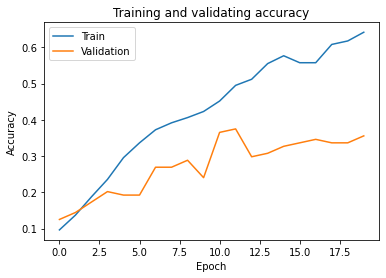

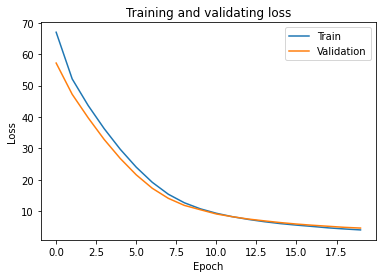

Epoch 1/20
13/13 [==============================] - 1s 50ms/step - loss: 94.3089 - accuracy: 0.0745 - val_loss: 72.2094 - val_accuracy: 0.1250
Epoch 2/20
13/13 [==============================] - 0s 30ms/step - loss: 65.9355 - accuracy: 0.1466 - val_loss: 60.3050 - val_accuracy: 0.1442
Epoch 3/20
13/13 [==============================] - 0s 31ms/step - loss: 56.0783 - accuracy: 0.1322 - val_loss: 51.6065 - val_accuracy: 0.1731
Epoch 4/20
13/13 [==============================] - 1s 36ms/step - loss: 47.8504 - accuracy: 0.1923 - val_loss: 43.9444 - val_accuracy: 0.2019
Epoch 5/20
13/13 [==============================] - 1s 39ms/step - loss: 40.6771 - accuracy: 0.2476 - val_loss: 37.2983 - val_accuracy: 0.2019
Epoch 6/20
13/13 [==============================] - 0s 33ms/step - loss: 34.4341 - accuracy: 0.2933 - val_loss: 31.6138 - val_accuracy: 0.2788
Epoch 7/20
13/13 [==============================] - 0s 31ms/step - loss: 29.2027 - accuracy: 0.3413 - val_loss: 27.0245 - val_accuracy: 0.3365

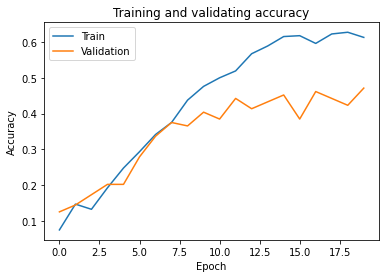

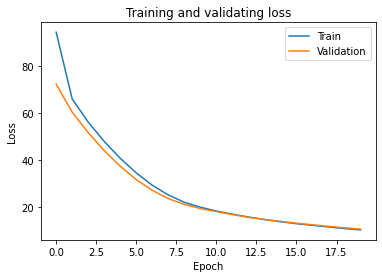

Epoch 1/20
13/13 [==============================] - 1s 56ms/step - loss: 110.3911 - accuracy: 0.0986 - val_loss: 89.3839 - val_accuracy: 0.1154
Epoch 2/20
13/13 [==============================] - 1s 45ms/step - loss: 83.2981 - accuracy: 0.1418 - val_loss: 77.5865 - val_accuracy: 0.0577
Epoch 3/20
13/13 [==============================] - 1s 55ms/step - loss: 72.4993 - accuracy: 0.1779 - val_loss: 67.5056 - val_accuracy: 0.1731
Epoch 4/20
13/13 [==============================] - 1s 41ms/step - loss: 63.3182 - accuracy: 0.1947 - val_loss: 58.9074 - val_accuracy: 0.1635
Epoch 5/20
13/13 [==============================] - 0s 32ms/step - loss: 55.1027 - accuracy: 0.2139 - val_loss: 51.1453 - val_accuracy: 0.2019
Epoch 6/20
13/13 [==============================] - 0s 31ms/step - loss: 47.7272 - accuracy: 0.2524 - val_loss: 44.3668 - val_accuracy: 0.1827
Epoch 7/20
13/13 [==============================] - 0s 32ms/step - loss: 41.2720 - accuracy: 0.2861 - val_loss: 38.4603 - val_accuracy: 0.250

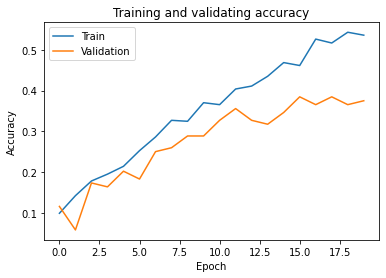

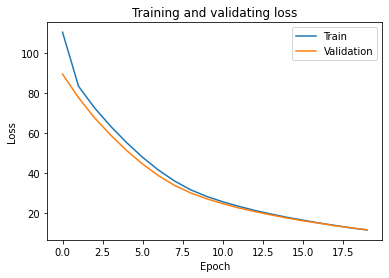

In [27]:
# for regularision, we add l1 regularision at the last convolution layer firstly.

for i in [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]:
    
    cnn_reg1 = keras.Sequential(
    [
        layers.Input((32,32,3)),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(24, (3, 3), activation='relu'),
        layers.Conv2D(24, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l1(i)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ]
    )
    
    cnn_reg1.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

    cnn_reg1_his = cnn_reg1.fit(train_data, validation_data=val_data, epochs=20)

    plt.plot(cnn_reg1_his.history['accuracy'], label='Train')
    plt.plot(cnn_reg1_his.history['val_accuracy'], label='Validation')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title('Training and validating accuracy')
    plt.legend()
    plt.show()

    plt.plot(cnn_reg1_his.history['loss'], label='Train')
    plt.plot(cnn_reg1_his.history['val_loss'], label='Validation')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Training and validating loss')
    plt.legend()
    plt.show()
    
# 0.05

Epoch 1/20
13/13 [==============================] - 1s 48ms/step - loss: 28.7193 - accuracy: 0.1154 - val_loss: 19.9931 - val_accuracy: 0.1442
Epoch 2/20
13/13 [==============================] - 0s 34ms/step - loss: 17.8498 - accuracy: 0.1202 - val_loss: 15.7795 - val_accuracy: 0.1058
Epoch 3/20
13/13 [==============================] - 0s 34ms/step - loss: 14.8437 - accuracy: 0.1514 - val_loss: 14.0354 - val_accuracy: 0.1250
Epoch 4/20
13/13 [==============================] - 1s 77ms/step - loss: 13.0732 - accuracy: 0.2260 - val_loss: 12.6353 - val_accuracy: 0.1442
Epoch 5/20
13/13 [==============================] - 0s 34ms/step - loss: 11.6588 - accuracy: 0.2740 - val_loss: 11.5095 - val_accuracy: 0.1442
Epoch 6/20
13/13 [==============================] - 0s 36ms/step - loss: 10.4126 - accuracy: 0.3558 - val_loss: 10.5219 - val_accuracy: 0.2212
Epoch 7/20
13/13 [==============================] - 0s 35ms/step - loss: 9.3097 - accuracy: 0.4904 - val_loss: 9.6892 - val_accuracy: 0.2404
E

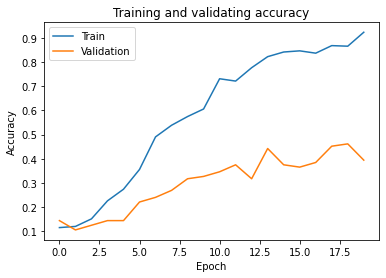

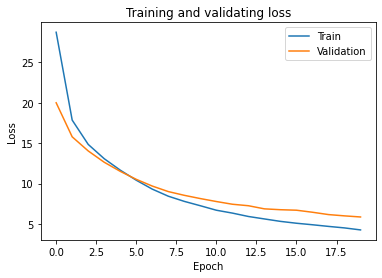

Epoch 1/20
13/13 [==============================] - 2s 76ms/step - loss: 36.4457 - accuracy: 0.0841 - val_loss: 27.1150 - val_accuracy: 0.0673
Epoch 2/20
13/13 [==============================] - 1s 51ms/step - loss: 25.1560 - accuracy: 0.0986 - val_loss: 23.5349 - val_accuracy: 0.0962
Epoch 3/20
13/13 [==============================] - 0s 34ms/step - loss: 22.3165 - accuracy: 0.1274 - val_loss: 21.0780 - val_accuracy: 0.1731
Epoch 4/20
13/13 [==============================] - 1s 38ms/step - loss: 19.9344 - accuracy: 0.1779 - val_loss: 18.8638 - val_accuracy: 0.2019
Epoch 5/20
13/13 [==============================] - 0s 36ms/step - loss: 17.7443 - accuracy: 0.2548 - val_loss: 16.9141 - val_accuracy: 0.2115
Epoch 6/20
13/13 [==============================] - 1s 47ms/step - loss: 15.8228 - accuracy: 0.2812 - val_loss: 15.1715 - val_accuracy: 0.1923
Epoch 7/20
13/13 [==============================] - 1s 36ms/step - loss: 14.1035 - accuracy: 0.3630 - val_loss: 13.6970 - val_accuracy: 0.2788

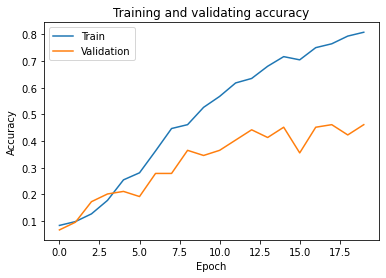

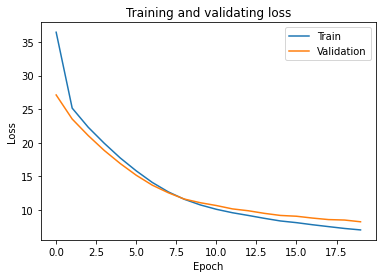

Epoch 1/20
13/13 [==============================] - 1s 46ms/step - loss: 48.8622 - accuracy: 0.1130 - val_loss: 38.4610 - val_accuracy: 0.2115
Epoch 2/20
13/13 [==============================] - 0s 33ms/step - loss: 35.3374 - accuracy: 0.1202 - val_loss: 32.9105 - val_accuracy: 0.1442
Epoch 3/20
13/13 [==============================] - 0s 33ms/step - loss: 30.6675 - accuracy: 0.1562 - val_loss: 28.7821 - val_accuracy: 0.1250
Epoch 4/20
13/13 [==============================] - 1s 36ms/step - loss: 26.8831 - accuracy: 0.1851 - val_loss: 25.3544 - val_accuracy: 0.2019
Epoch 5/20
13/13 [==============================] - 1s 37ms/step - loss: 23.5864 - accuracy: 0.2188 - val_loss: 22.2817 - val_accuracy: 0.1827
Epoch 6/20
13/13 [==============================] - 0s 33ms/step - loss: 20.7012 - accuracy: 0.3077 - val_loss: 19.6889 - val_accuracy: 0.1442
Epoch 7/20
13/13 [==============================] - 0s 32ms/step - loss: 18.2187 - accuracy: 0.3293 - val_loss: 17.5238 - val_accuracy: 0.1923

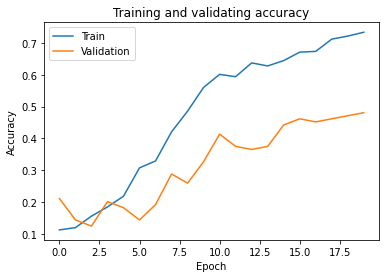

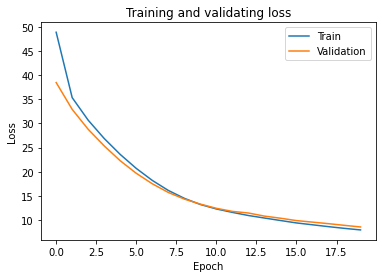

Epoch 1/20
13/13 [==============================] - 1s 68ms/step - loss: 66.5751 - accuracy: 0.1226 - val_loss: 50.6791 - val_accuracy: 0.0577
Epoch 2/20
13/13 [==============================] - 0s 33ms/step - loss: 46.6894 - accuracy: 0.1178 - val_loss: 42.7611 - val_accuracy: 0.1923
Epoch 3/20
13/13 [==============================] - 1s 42ms/step - loss: 40.5814 - accuracy: 0.1659 - val_loss: 38.3763 - val_accuracy: 0.1731
Epoch 4/20
13/13 [==============================] - 1s 38ms/step - loss: 36.4207 - accuracy: 0.2043 - val_loss: 34.5735 - val_accuracy: 0.1346
Epoch 5/20
13/13 [==============================] - 1s 36ms/step - loss: 32.7212 - accuracy: 0.2524 - val_loss: 31.1594 - val_accuracy: 0.1635
Epoch 6/20
13/13 [==============================] - 0s 36ms/step - loss: 29.3665 - accuracy: 0.3125 - val_loss: 28.1419 - val_accuracy: 0.1731
Epoch 7/20
13/13 [==============================] - 1s 44ms/step - loss: 26.4362 - accuracy: 0.3510 - val_loss: 25.5020 - val_accuracy: 0.1731

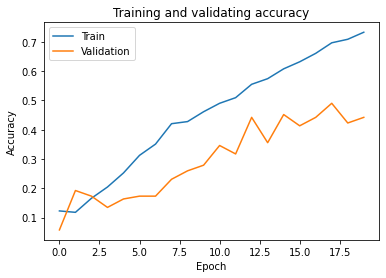

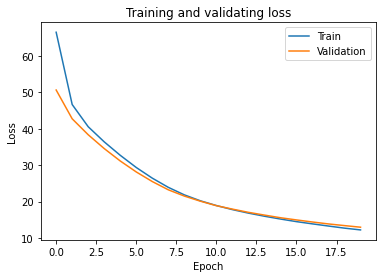

Epoch 1/20
13/13 [==============================] - 1s 50ms/step - loss: 78.7670 - accuracy: 0.1226 - val_loss: 64.0964 - val_accuracy: 0.1154
Epoch 2/20
13/13 [==============================] - 1s 43ms/step - loss: 58.4872 - accuracy: 0.1370 - val_loss: 54.0809 - val_accuracy: 0.1538
Epoch 3/20
13/13 [==============================] - 1s 37ms/step - loss: 51.4965 - accuracy: 0.1442 - val_loss: 48.6683 - val_accuracy: 0.1442
Epoch 4/20
13/13 [==============================] - 1s 44ms/step - loss: 46.4948 - accuracy: 0.1418 - val_loss: 44.1423 - val_accuracy: 0.1538
Epoch 5/20
13/13 [==============================] - 1s 37ms/step - loss: 42.0601 - accuracy: 0.1587 - val_loss: 40.0333 - val_accuracy: 0.1538
Epoch 6/20
13/13 [==============================] - 1s 45ms/step - loss: 38.0905 - accuracy: 0.2091 - val_loss: 36.3158 - val_accuracy: 0.1538
Epoch 7/20
13/13 [==============================] - 1s 43ms/step - loss: 34.5916 - accuracy: 0.2716 - val_loss: 33.0615 - val_accuracy: 0.1827

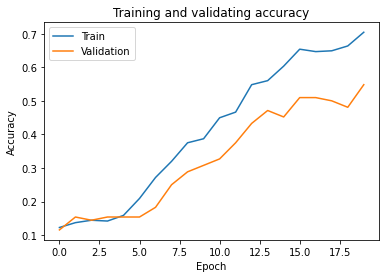

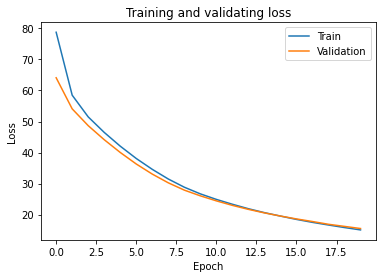

Epoch 1/20
13/13 [==============================] - 2s 65ms/step - loss: 73.7857 - accuracy: 0.0889 - val_loss: 64.1968 - val_accuracy: 0.1058
Epoch 2/20
13/13 [==============================] - 1s 46ms/step - loss: 59.1208 - accuracy: 0.1731 - val_loss: 53.8726 - val_accuracy: 0.1442
Epoch 3/20
13/13 [==============================] - 1s 43ms/step - loss: 49.6075 - accuracy: 0.2019 - val_loss: 44.9020 - val_accuracy: 0.1923
Epoch 4/20
13/13 [==============================] - 1s 46ms/step - loss: 41.0805 - accuracy: 0.3053 - val_loss: 36.9679 - val_accuracy: 0.2308
Epoch 5/20
13/13 [==============================] - 0s 33ms/step - loss: 33.5155 - accuracy: 0.3293 - val_loss: 30.0031 - val_accuracy: 0.3077
Epoch 6/20
13/13 [==============================] - 0s 32ms/step - loss: 26.9907 - accuracy: 0.3678 - val_loss: 23.9883 - val_accuracy: 0.3365
Epoch 7/20
13/13 [==============================] - 0s 36ms/step - loss: 21.4521 - accuracy: 0.4135 - val_loss: 19.0354 - val_accuracy: 0.3365

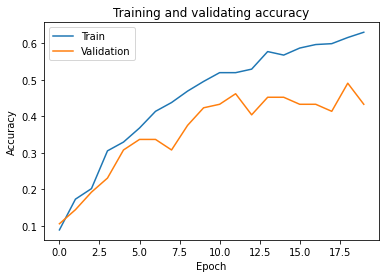

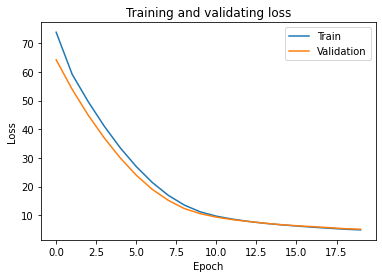

Epoch 1/20
13/13 [==============================] - 2s 65ms/step - loss: 90.4224 - accuracy: 0.0817 - val_loss: 78.2738 - val_accuracy: 0.0962
Epoch 2/20
13/13 [==============================] - 1s 54ms/step - loss: 71.9747 - accuracy: 0.1466 - val_loss: 65.9914 - val_accuracy: 0.0962
Epoch 3/20
13/13 [==============================] - 1s 50ms/step - loss: 60.9818 - accuracy: 0.1755 - val_loss: 56.0899 - val_accuracy: 0.1731
Epoch 4/20
13/13 [==============================] - 1s 42ms/step - loss: 51.5532 - accuracy: 0.2332 - val_loss: 47.2276 - val_accuracy: 0.2212
Epoch 5/20
13/13 [==============================] - 0s 33ms/step - loss: 43.1686 - accuracy: 0.3389 - val_loss: 39.5214 - val_accuracy: 0.2212
Epoch 6/20
13/13 [==============================] - 1s 44ms/step - loss: 35.8925 - accuracy: 0.3726 - val_loss: 32.8020 - val_accuracy: 0.2692
Epoch 7/20
13/13 [==============================] - 1s 50ms/step - loss: 29.6912 - accuracy: 0.4111 - val_loss: 27.2523 - val_accuracy: 0.2885

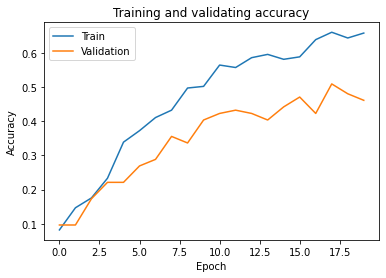

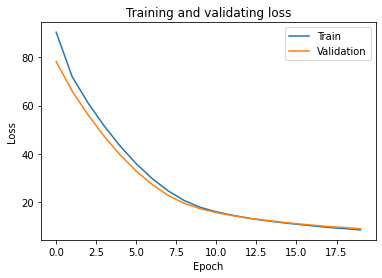

In [31]:
# for regularision, we add l1 regularision at the last convolution layer firstly.

for i in [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]:
    
    cnn_reg2 = keras.Sequential(
    [
        layers.Input((32,32,3)),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(24, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l1(i)),
        layers.Conv2D(24, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l1(0.05)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ]
    )
    
    cnn_reg2.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

    cnn_reg2_his = cnn_reg2.fit(train_data, validation_data=val_data, epochs=20)

    plt.plot(cnn_reg2_his.history['accuracy'], label='Train')
    plt.plot(cnn_reg2_his.history['val_accuracy'], label='Validation')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title('Training and validating accuracy')
    plt.legend()
    plt.show()

    plt.plot(cnn_reg2_his.history['loss'], label='Train')
    plt.plot(cnn_reg2_his.history['val_loss'], label='Validation')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Training and validating loss')
    plt.legend()
    plt.show()
    
# 0.2

Epoch 1/20
13/13 [==============================] - 1s 50ms/step - loss: 17.7416 - accuracy: 0.1346 - val_loss: 3.8344 - val_accuracy: 0.1442
Epoch 2/20
13/13 [==============================] - 1s 40ms/step - loss: 4.2601 - accuracy: 0.0913 - val_loss: 2.4593 - val_accuracy: 0.1250
Epoch 3/20
13/13 [==============================] - 1s 41ms/step - loss: 2.6606 - accuracy: 0.1178 - val_loss: 2.3007 - val_accuracy: 0.0962
Epoch 4/20
13/13 [==============================] - 1s 40ms/step - loss: 2.4009 - accuracy: 0.1394 - val_loss: 2.2300 - val_accuracy: 0.1250
Epoch 5/20
13/13 [==============================] - 1s 42ms/step - loss: 2.3258 - accuracy: 0.1466 - val_loss: 2.2352 - val_accuracy: 0.1442
Epoch 6/20
13/13 [==============================] - 1s 41ms/step - loss: 2.2800 - accuracy: 0.1587 - val_loss: 2.2500 - val_accuracy: 0.1635
Epoch 7/20
13/13 [==============================] - 1s 41ms/step - loss: 2.2596 - accuracy: 0.1442 - val_loss: 2.2497 - val_accuracy: 0.1635
Epoch 8/20
1

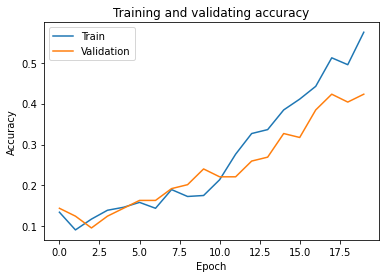

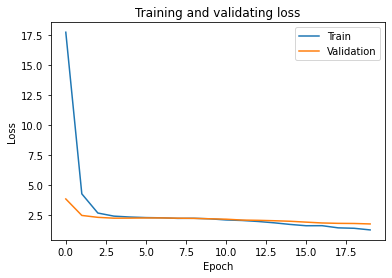

Epoch 1/20
13/13 [==============================] - 1s 51ms/step - loss: 34.1272 - accuracy: 0.1082 - val_loss: 6.3420 - val_accuracy: 0.1346
Epoch 2/20
13/13 [==============================] - 1s 39ms/step - loss: 6.8090 - accuracy: 0.1154 - val_loss: 3.0851 - val_accuracy: 0.1154
Epoch 3/20
13/13 [==============================] - 1s 41ms/step - loss: 3.4301 - accuracy: 0.1106 - val_loss: 2.3744 - val_accuracy: 0.1923
Epoch 4/20
13/13 [==============================] - 1s 41ms/step - loss: 2.7574 - accuracy: 0.1442 - val_loss: 2.2326 - val_accuracy: 0.2500
Epoch 5/20
13/13 [==============================] - 1s 40ms/step - loss: 2.5469 - accuracy: 0.2091 - val_loss: 2.2094 - val_accuracy: 0.2115
Epoch 6/20
13/13 [==============================] - 1s 39ms/step - loss: 2.3617 - accuracy: 0.1851 - val_loss: 2.2282 - val_accuracy: 0.2212
Epoch 7/20
13/13 [==============================] - 1s 40ms/step - loss: 2.2183 - accuracy: 0.2212 - val_loss: 2.1703 - val_accuracy: 0.2788
Epoch 8/20
1

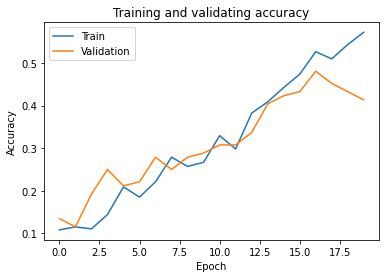

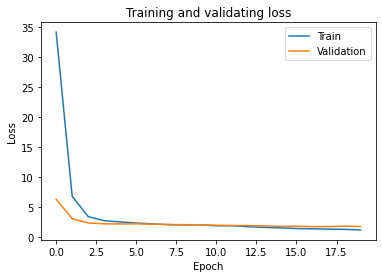

Epoch 1/20
13/13 [==============================] - 1s 49ms/step - loss: 27.2722 - accuracy: 0.1250 - val_loss: 3.1613 - val_accuracy: 0.0769
Epoch 2/20
13/13 [==============================] - 1s 40ms/step - loss: 3.5413 - accuracy: 0.1010 - val_loss: 2.3467 - val_accuracy: 0.1250
Epoch 3/20
13/13 [==============================] - 1s 38ms/step - loss: 2.3793 - accuracy: 0.1250 - val_loss: 2.3097 - val_accuracy: 0.1346
Epoch 4/20
13/13 [==============================] - 1s 37ms/step - loss: 2.3274 - accuracy: 0.1010 - val_loss: 2.3109 - val_accuracy: 0.1346
Epoch 5/20
13/13 [==============================] - 1s 38ms/step - loss: 2.3083 - accuracy: 0.1010 - val_loss: 2.3112 - val_accuracy: 0.0673
Epoch 6/20
13/13 [==============================] - 1s 39ms/step - loss: 2.3029 - accuracy: 0.1082 - val_loss: 2.3124 - val_accuracy: 0.0673
Epoch 7/20
13/13 [==============================] - 1s 38ms/step - loss: 2.3020 - accuracy: 0.1226 - val_loss: 2.3142 - val_accuracy: 0.0673
Epoch 8/20
1

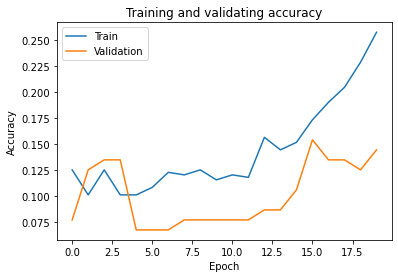

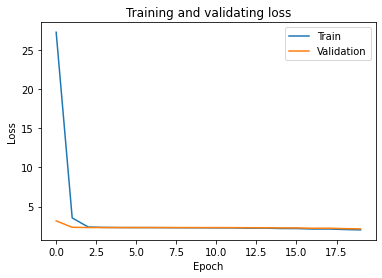

Epoch 1/20
13/13 [==============================] - 1s 49ms/step - loss: 16.1572 - accuracy: 0.0817 - val_loss: 3.1601 - val_accuracy: 0.1731
Epoch 2/20
13/13 [==============================] - 1s 38ms/step - loss: 3.6132 - accuracy: 0.0938 - val_loss: 2.3664 - val_accuracy: 0.1250
Epoch 3/20
13/13 [==============================] - 1s 38ms/step - loss: 2.5645 - accuracy: 0.1034 - val_loss: 2.2902 - val_accuracy: 0.1250
Epoch 4/20
13/13 [==============================] - 1s 37ms/step - loss: 2.3778 - accuracy: 0.1274 - val_loss: 2.3036 - val_accuracy: 0.0673
Epoch 5/20
13/13 [==============================] - 1s 38ms/step - loss: 2.2983 - accuracy: 0.1394 - val_loss: 2.2942 - val_accuracy: 0.0673
Epoch 6/20
13/13 [==============================] - 1s 38ms/step - loss: 2.3177 - accuracy: 0.1418 - val_loss: 2.2721 - val_accuracy: 0.0769
Epoch 7/20
13/13 [==============================] - 1s 38ms/step - loss: 2.2906 - accuracy: 0.1538 - val_loss: 2.2587 - val_accuracy: 0.0962
Epoch 8/20
1

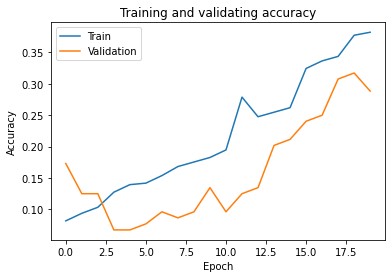

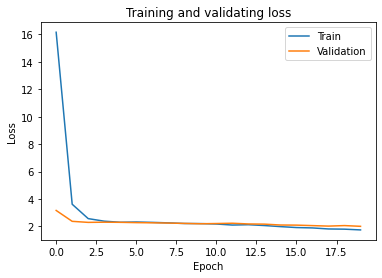

Epoch 1/20
13/13 [==============================] - 1s 50ms/step - loss: 63.9812 - accuracy: 0.0889 - val_loss: 11.1808 - val_accuracy: 0.0865
Epoch 2/20
13/13 [==============================] - 1s 38ms/step - loss: 17.0065 - accuracy: 0.0986 - val_loss: 5.4137 - val_accuracy: 0.0769
Epoch 3/20
13/13 [==============================] - 1s 39ms/step - loss: 7.7451 - accuracy: 0.0913 - val_loss: 3.4910 - val_accuracy: 0.1635
Epoch 4/20
13/13 [==============================] - 1s 39ms/step - loss: 5.1014 - accuracy: 0.1178 - val_loss: 3.0488 - val_accuracy: 0.1923
Epoch 5/20
13/13 [==============================] - 1s 38ms/step - loss: 4.0716 - accuracy: 0.1346 - val_loss: 2.8526 - val_accuracy: 0.1635
Epoch 6/20
13/13 [==============================] - 1s 39ms/step - loss: 3.3948 - accuracy: 0.1274 - val_loss: 2.5511 - val_accuracy: 0.1827
Epoch 7/20
13/13 [==============================] - 1s 37ms/step - loss: 3.0327 - accuracy: 0.0986 - val_loss: 2.3838 - val_accuracy: 0.1923
Epoch 8/20

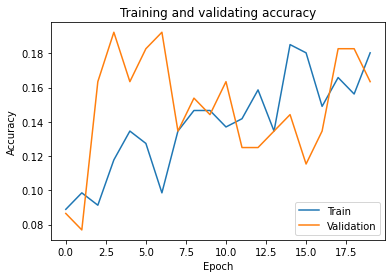

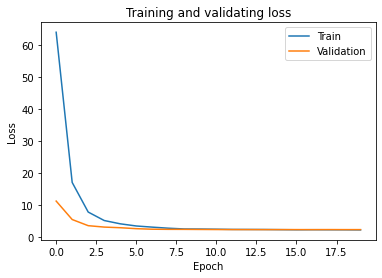

Epoch 1/20
13/13 [==============================] - 1s 50ms/step - loss: 24.6918 - accuracy: 0.1226 - val_loss: 4.5823 - val_accuracy: 0.0673
Epoch 2/20
13/13 [==============================] - 1s 39ms/step - loss: 7.0283 - accuracy: 0.1082 - val_loss: 2.6944 - val_accuracy: 0.1346
Epoch 3/20
13/13 [==============================] - 1s 39ms/step - loss: 4.2270 - accuracy: 0.0841 - val_loss: 2.3341 - val_accuracy: 0.1827
Epoch 4/20
13/13 [==============================] - 1s 38ms/step - loss: 3.2441 - accuracy: 0.1178 - val_loss: 2.2418 - val_accuracy: 0.1827
Epoch 5/20
13/13 [==============================] - 1s 38ms/step - loss: 2.9945 - accuracy: 0.0962 - val_loss: 2.2824 - val_accuracy: 0.2019
Epoch 6/20
13/13 [==============================] - 1s 38ms/step - loss: 2.7329 - accuracy: 0.1298 - val_loss: 2.3254 - val_accuracy: 0.1346
Epoch 7/20
13/13 [==============================] - 1s 39ms/step - loss: 2.5758 - accuracy: 0.1202 - val_loss: 2.3075 - val_accuracy: 0.1250
Epoch 8/20
1

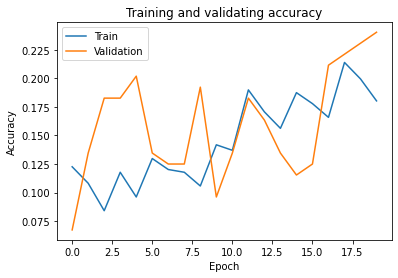

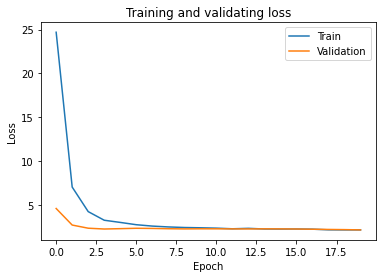

Epoch 1/20
13/13 [==============================] - 1s 48ms/step - loss: 43.9067 - accuracy: 0.1058 - val_loss: 6.0969 - val_accuracy: 0.1154
Epoch 2/20
13/13 [==============================] - 1s 37ms/step - loss: 10.5384 - accuracy: 0.1466 - val_loss: 3.0933 - val_accuracy: 0.1154
Epoch 3/20
13/13 [==============================] - 1s 38ms/step - loss: 4.7753 - accuracy: 0.1418 - val_loss: 2.7227 - val_accuracy: 0.0769
Epoch 4/20
13/13 [==============================] - 1s 39ms/step - loss: 3.3573 - accuracy: 0.1202 - val_loss: 2.5329 - val_accuracy: 0.0673
Epoch 5/20
13/13 [==============================] - 1s 39ms/step - loss: 3.0606 - accuracy: 0.1058 - val_loss: 2.4189 - val_accuracy: 0.0769
Epoch 6/20
13/13 [==============================] - 1s 39ms/step - loss: 2.7859 - accuracy: 0.1178 - val_loss: 2.3682 - val_accuracy: 0.0962
Epoch 7/20
13/13 [==============================] - 1s 38ms/step - loss: 2.5295 - accuracy: 0.1731 - val_loss: 2.3000 - val_accuracy: 0.1538
Epoch 8/20


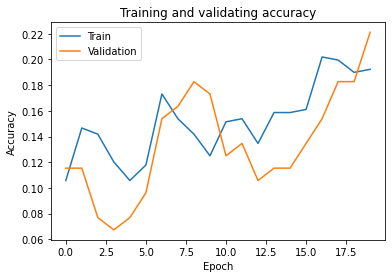

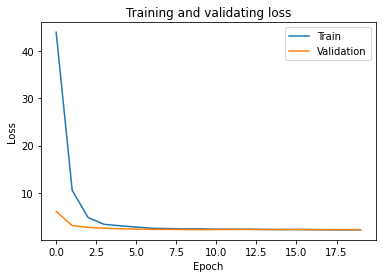

Epoch 1/20
13/13 [==============================] - 1s 49ms/step - loss: 62.0196 - accuracy: 0.1346 - val_loss: 7.3335 - val_accuracy: 0.0769
Epoch 2/20
13/13 [==============================] - 1s 38ms/step - loss: 11.0868 - accuracy: 0.0962 - val_loss: 3.7082 - val_accuracy: 0.0962
Epoch 3/20
13/13 [==============================] - 1s 38ms/step - loss: 5.3472 - accuracy: 0.1082 - val_loss: 2.9538 - val_accuracy: 0.0481
Epoch 4/20
13/13 [==============================] - 1s 38ms/step - loss: 3.3319 - accuracy: 0.1130 - val_loss: 2.6621 - val_accuracy: 0.0769
Epoch 5/20
13/13 [==============================] - 1s 39ms/step - loss: 2.6512 - accuracy: 0.0938 - val_loss: 2.4767 - val_accuracy: 0.0673
Epoch 6/20
13/13 [==============================] - 1s 37ms/step - loss: 2.4924 - accuracy: 0.1106 - val_loss: 2.4446 - val_accuracy: 0.0481
Epoch 7/20
13/13 [==============================] - 1s 41ms/step - loss: 2.4835 - accuracy: 0.1010 - val_loss: 2.4030 - val_accuracy: 0.0673
Epoch 8/20


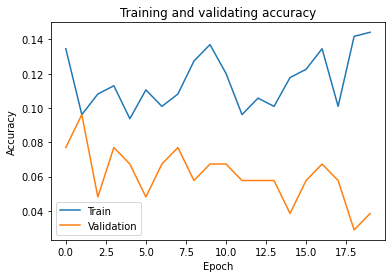

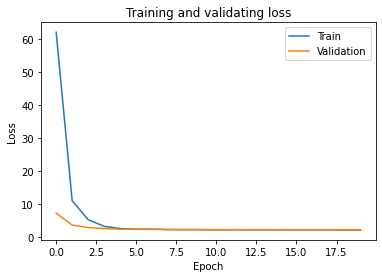

Epoch 1/20
13/13 [==============================] - 1s 48ms/step - loss: 38.9595 - accuracy: 0.1226 - val_loss: 4.7770 - val_accuracy: 0.1154
Epoch 2/20
13/13 [==============================] - 1s 38ms/step - loss: 5.1588 - accuracy: 0.1298 - val_loss: 2.3952 - val_accuracy: 0.0769
Epoch 3/20
13/13 [==============================] - 1s 38ms/step - loss: 2.5430 - accuracy: 0.0913 - val_loss: 2.3251 - val_accuracy: 0.1635
Epoch 4/20
13/13 [==============================] - 1s 39ms/step - loss: 2.3702 - accuracy: 0.0745 - val_loss: 2.3104 - val_accuracy: 0.0865
Epoch 5/20
13/13 [==============================] - 1s 38ms/step - loss: 2.3398 - accuracy: 0.1106 - val_loss: 2.3090 - val_accuracy: 0.0673
Epoch 6/20
13/13 [==============================] - 1s 38ms/step - loss: 2.3357 - accuracy: 0.1082 - val_loss: 2.3064 - val_accuracy: 0.0577
Epoch 7/20
13/13 [==============================] - 1s 38ms/step - loss: 2.3206 - accuracy: 0.0913 - val_loss: 2.3053 - val_accuracy: 0.0481
Epoch 8/20
1

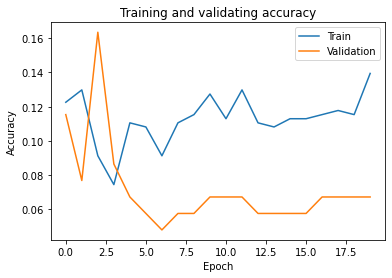

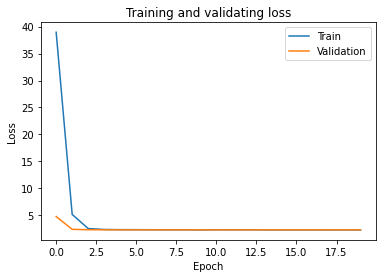

In [38]:
# try drop out:
for i in [0.1,0.2,0.3]:
    for j in [0.1,0.2,0.3]:
        cnn_drop = keras.Sequential(
        [
        layers.Input((32,32,3)),
        layers.Conv2D(16, (3, 3), activation='relu'),
        keras.layers.Dropout(i),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(24, (3, 3), activation='relu'),
        keras.layers.Dropout(j),
        layers.Conv2D(24, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
        ]
        )
        
        cnn_drop.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                    metrics=['accuracy'])

        cnn_drop_his = cnn_drop.fit(train_data, validation_data=val_data, epochs=20)

        plt.plot(cnn_drop_his.history['accuracy'], label='Train')
        plt.plot(cnn_drop_his.history['val_accuracy'], label='Validation')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.title('Training and validating accuracy')
        plt.legend()
        plt.show()

        plt.plot(cnn_drop_his.history['loss'], label='Train')
        plt.plot(cnn_drop_his.history['val_loss'], label='Validation')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.title('Training and validating loss')
        plt.legend()
        plt.show()

Epoch 1/150
13/13 [==============================] - 2s 54ms/step - loss: 68.4435 - accuracy: 0.1683 - val_loss: 58.2530 - val_accuracy: 0.1154
Epoch 2/150
13/13 [==============================] - 1s 40ms/step - loss: 53.8761 - accuracy: 0.0986 - val_loss: 50.1914 - val_accuracy: 0.1154
Epoch 3/150
13/13 [==============================] - 1s 39ms/step - loss: 47.2589 - accuracy: 0.1562 - val_loss: 44.3219 - val_accuracy: 0.1154
Epoch 4/150
13/13 [==============================] - 1s 40ms/step - loss: 41.6948 - accuracy: 0.1442 - val_loss: 39.0284 - val_accuracy: 0.1250
Epoch 5/150
13/13 [==============================] - 1s 40ms/step - loss: 36.6726 - accuracy: 0.1466 - val_loss: 34.2680 - val_accuracy: 0.0865
Epoch 6/150
13/13 [==============================] - 1s 58ms/step - loss: 32.1880 - accuracy: 0.1803 - val_loss: 30.0537 - val_accuracy: 0.1827
Epoch 7/150
13/13 [==============================] - 1s 56ms/step - loss: 28.2563 - accuracy: 0.1923 - val_loss: 26.5046 - val_accuracy:

13/13 [==============================] - 1s 36ms/step - loss: 2.7931 - accuracy: 0.6250 - val_loss: 2.9805 - val_accuracy: 0.5865
Epoch 59/150
13/13 [==============================] - 0s 35ms/step - loss: 2.7615 - accuracy: 0.6082 - val_loss: 2.8537 - val_accuracy: 0.6058
Epoch 60/150
13/13 [==============================] - 0s 36ms/step - loss: 2.6594 - accuracy: 0.6490 - val_loss: 2.8297 - val_accuracy: 0.5962
Epoch 61/150
13/13 [==============================] - 0s 35ms/step - loss: 2.5898 - accuracy: 0.6635 - val_loss: 2.7927 - val_accuracy: 0.5769
Epoch 62/150
13/13 [==============================] - 0s 35ms/step - loss: 2.4986 - accuracy: 0.6250 - val_loss: 2.6747 - val_accuracy: 0.5865
Epoch 63/150
13/13 [==============================] - 1s 36ms/step - loss: 2.4628 - accuracy: 0.6346 - val_loss: 2.6850 - val_accuracy: 0.5865
Epoch 64/150
13/13 [==============================] - 0s 36ms/step - loss: 2.4413 - accuracy: 0.6346 - val_loss: 2.6830 - val_accuracy: 0.6058
Epoch 65/150

13/13 [==============================] - 1s 44ms/step - loss: 1.4054 - accuracy: 0.6755 - val_loss: 1.6218 - val_accuracy: 0.6538
Epoch 116/150
13/13 [==============================] - 1s 49ms/step - loss: 1.3810 - accuracy: 0.7067 - val_loss: 1.7233 - val_accuracy: 0.6058
Epoch 117/150
13/13 [==============================] - 1s 61ms/step - loss: 1.3069 - accuracy: 0.7212 - val_loss: 1.6532 - val_accuracy: 0.6346
Epoch 118/150
13/13 [==============================] - 1s 62ms/step - loss: 1.3241 - accuracy: 0.7236 - val_loss: 1.6286 - val_accuracy: 0.6442
Epoch 119/150
13/13 [==============================] - 1s 44ms/step - loss: 1.3997 - accuracy: 0.6803 - val_loss: 1.7437 - val_accuracy: 0.6058
Epoch 120/150
13/13 [==============================] - 1s 59ms/step - loss: 1.3786 - accuracy: 0.7019 - val_loss: 1.5914 - val_accuracy: 0.6442
Epoch 121/150
13/13 [==============================] - 1s 54ms/step - loss: 1.3021 - accuracy: 0.7260 - val_loss: 1.6122 - val_accuracy: 0.6058
Epoch 

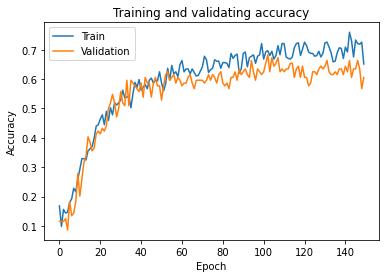

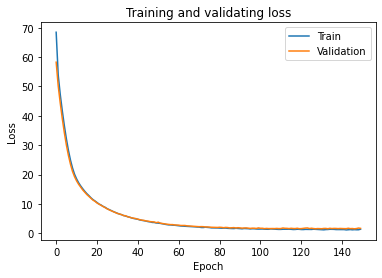

In [70]:
# data augmentation
cnn_final = keras.Sequential(
            [
                layers.RandomFlip('horizontal'),
                layers.RandomZoom(0.4),
                layers.Input((32,32,3)),
                layers.Conv2D(16, (3, 3), activation='relu'),
                layers.Conv2D(16, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(24, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l1(0.2)),
                layers.Conv2D(24, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l1(0.05)),
                layers.MaxPooling2D((2, 2)),
                layers.Flatten(),
                layers.Dense(10, activation='softmax')
            ]
            )

cnn_final.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

cnn_final_his = cnn_final.fit(train_data, validation_data=val_data, epochs=150)

plt.plot(cnn_final_his.history['accuracy'], label='Train')
plt.plot(cnn_final_his.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

plt.plot(cnn_final_his.history['loss'], label='Train')
plt.plot(cnn_final_his.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss')
plt.legend()
plt.show()

### 2. Error anaylsis
Evaluate your CNN model from question 1.2 on the test dataset. See assignment spec for details.

In [83]:
import os

test_result = []
path = data_dir + '/test'
class_list = os.listdir(path)
for one_class in class_list:
    if one_class in class_names:
        test_class = []
        test_name = []
        test_value = []
        test_class.append(one_class)
        add_in = '/test/' + one_class
        new_path = data_dir + add_in
        class_set = os.listdir(new_path)
        for one_sample in class_set:
            test_name.append(one_sample)
            path_next = data_dir + add_in + '/' + one_sample
            print(path_next)
            img = image.load_img(path_next, target_size=(32,32))
            array = image.img_to_array(img)
            array = np.expand_dims(array, axis=0)
            pred = cnn_final.predict(array)
            test_value.append(pred.argmax())
        test_result.append([test_class, test_name, test_value])

/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree453893.jpg
1/1 [==============================] - 0s 32ms/step
/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree966053.jpg
1/1 [==============================] - 0s 18ms/step
/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree202075.jpg
1/1 [==============================] - 0s 47ms/step
/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree430278.jpg
1/1 [==============================] - 0s 22ms/step
/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree109334.jpg
1/1 [==============================] - 0s 18ms/step
/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree217994.jpg
1/1 [==============================] - 0s 27ms/step
/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree671166.jpg
1/1 [==============================] - 0s 27ms/step
/Users/apple/Desktop/COMP90086/yoga32/test/warrior2/warrior2837171.jpg
1/1 [==============================] - 0s 27ms/step
/Users/apple/Desktop/COMP90086/yoga32/test/warrior2/warrior2747663.jpg
1

1/1 [==============================] - 0s 34ms/step
/Users/apple/Desktop/COMP90086/yoga32/test/downwarddog/downwarddog248629.jpg
1/1 [==============================] - 0s 29ms/step
/Users/apple/Desktop/COMP90086/yoga32/test/downwarddog/downwarddog244165.jpg
1/1 [==============================] - 0s 23ms/step
/Users/apple/Desktop/COMP90086/yoga32/test/downwarddog/downwarddog899005.jpg
1/1 [==============================] - 0s 29ms/step


In [90]:
class_dict = {}
for index, i in enumerate(class_names):
    class_dict[i] = index

test_prob = []
m = 0
for j in test_result:
    single_prob = []
    n = 0
    name = j[0][0]
    single_prob.append(name)
    right_num = class_dict[name]
    wrong_pic = []
    for k in j[2]:
        if k == right_num:
            n += 1
            m += 1
        else:
            wrong_pic.append(k)
    single_prob.append(n/7)
    single_prob.append(wrong_pic)
    test_prob.append(single_prob)
    
print('The whole probability is ', m / 70)

The whole probability is  0.5714285714285714


In [92]:
test_prob

[['tree', 0.7142857142857143, [3, 8]],
 ['warrior2', 0.5714285714285714, [7, 0, 4]],
 ['bridge', 0.7142857142857143, [4, 7]],
 ['trianglepose', 0.7142857142857143, [4, 4]],
 ['childs', 0.14285714285714285, [5, 2, 4, 5, 4, 3]],
 ['warrior1', 0.5714285714285714, [6, 7, 4]],
 ['plank', 0.7142857142857143, [0, 9]],
 ['mountain', 0.7142857142857143, [7, 8]],
 ['seatedforwardbend', 0.14285714285714285, [4, 8, 4, 2, 6, 1]],
 ['downwarddog', 0.7142857142857143, [8, 6]]]

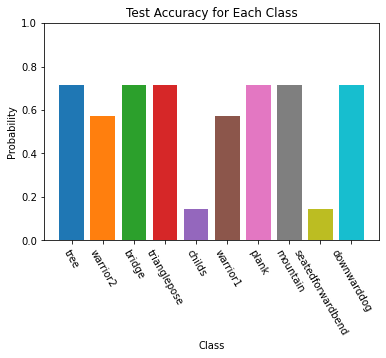

In [98]:
# draw the bar chart
x_value = []
y_value = []
for i in test_prob:
    x_value.append(i[0])
    y_value.append(i[1])
    
for i in range(len(x_value)):
    plt.bar(x_value[i], y_value[i])

plt.title('Test Accuracy for Each Class')
plt.xlabel('Class')
plt.ylim((0, 1))
plt.ylabel('Probability')
plt.xticks(rotation=300)
plt.show()

### 3. Visualisation
Visualise the feature space that your model uses to classify images. See assignment spec for details.

In [124]:
# get all train images path into one list
all_train_path = []
path = data_dir + '/train'
class_list = os.listdir(path)
for one_class in class_list:
    if one_class in class_names:
        add_in = '/train/' + one_class
        new_path = data_dir + add_in
        class_set = os.listdir(new_path)
        for one_sample in class_set:
            path_whole = data_dir + add_in + '/' + one_sample
            all_train_path.append(path_whole)
        
all_train_path

['/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree143156.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree669043.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree516997.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree152501.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree531889.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree620055.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree516990.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree612810.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree834189.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree55976.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree705572.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree819422.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree775555.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree863868.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/train/tre

In [125]:
# the name for flatten layer is flatten_76
# this step is to store all the flatten layer values of 520 photos in a list

train_flatten_value = []

for the_path in all_train_path:
    img = image.load_img(the_path, target_size=(32,32))
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    model = Model(inputs=cnn_final.input, outputs=cnn_final.get_layer('flatten_76').output)
    features = model.predict(array)
    train_flatten_value.append(features[0])

1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 68ms/step


In [127]:
# get all test image path into a list
all_test_path = []
path = data_dir + '/test'
class_list = os.listdir(path)
for one_class in class_list:
    if one_class in class_names:
        add_in = '/test/' + one_class
        new_path = data_dir + add_in
        class_set = os.listdir(new_path)
        for one_sample in class_set:
            path_whole = data_dir + add_in + '/' + one_sample
            all_test_path.append(path_whole)
        
all_test_path

['/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree453893.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree966053.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree202075.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree430278.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree109334.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree217994.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree671166.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/test/warrior2/warrior2837171.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/test/warrior2/warrior2747663.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/test/warrior2/warrior2694404.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/test/warrior2/warrior2625255.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/test/warrior2/warrior2431511.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/test/warrior2/warrior2287427.jpg',
 '/Users/apple/Desktop/COMP90086/yoga32/test/warrior2/warrior2645535.jpg',
 '/Use

In [128]:
# get test image flatten value and store them into a list
test_flatten_value = []

for the_path in all_test_path:
    img = image.load_img(the_path, target_size=(32,32))
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    model = Model(inputs=cnn_final.input, outputs=cnn_final.get_layer('flatten_76').output)
    
    features = model.predict(array)
    test_flatten_value.append(features[0])

1/1 [==============================] - 0s 70ms/step


In [162]:
neightbour_dictionary = {}
for i in range(len(test_flatten_value)):
    test_sample = test_flatten_value[i]
    one_sample_value = []
    for train_sample in train_flatten_value:
        one_sample_value.append(sum(abs((test_sample-train_sample)**2)))
    value_array = np.array(one_sample_value)
    top_5 = np.argsort(value_array)[0:5]
    near_file = []
    for j in top_5:
        near_file.append(all_train_path[j])
        
    neightbour_dictionary[all_test_path[i]] = near_file

In [163]:
neightbour_dictionary

{'/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree453893.jpg': ['/Users/apple/Desktop/COMP90086/yoga32/train/mountain/mountain47555.jpg',
  '/Users/apple/Desktop/COMP90086/yoga32/train/mountain/mountain47401.jpg',
  '/Users/apple/Desktop/COMP90086/yoga32/train/mountain/mountain307746.jpg',
  '/Users/apple/Desktop/COMP90086/yoga32/train/childs/childs424335.jpg',
  '/Users/apple/Desktop/COMP90086/yoga32/train/seatedforwardbend/seatedforwardbend95373.jpg'],
 '/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree966053.jpg': ['/Users/apple/Desktop/COMP90086/yoga32/train/mountain/mountain42660.jpg',
  '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree834189.jpg',
  '/Users/apple/Desktop/COMP90086/yoga32/train/tree/tree617390.jpg',
  '/Users/apple/Desktop/COMP90086/yoga32/train/mountain/mountain152234.jpg',
  '/Users/apple/Desktop/COMP90086/yoga32/train/mountain/mountain749822.jpg'],
 '/Users/apple/Desktop/COMP90086/yoga32/test/tree/tree202075.jpg': ['/Users/apple/Desktop/COMP90086/yo

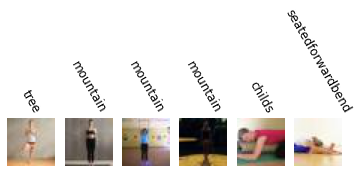

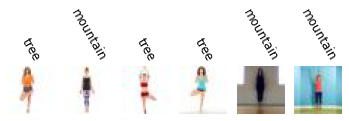

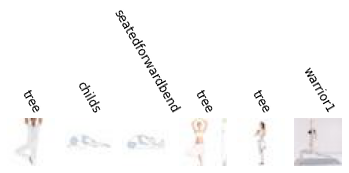

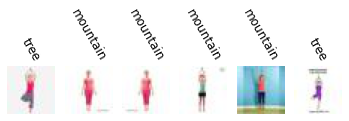

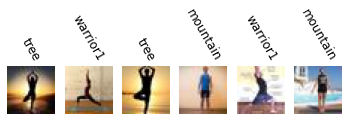

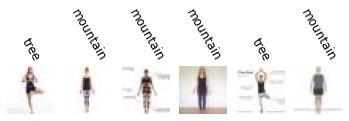

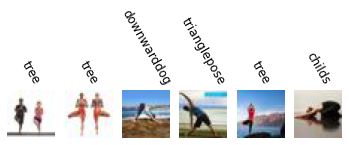

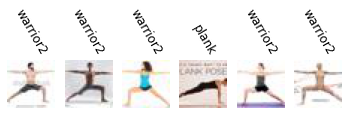

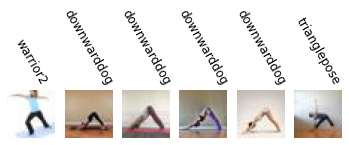

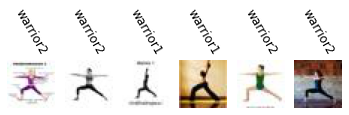

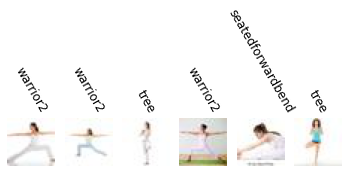

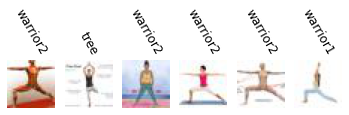

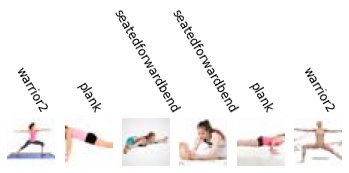

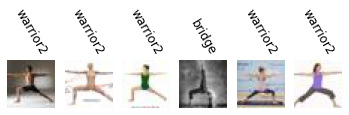

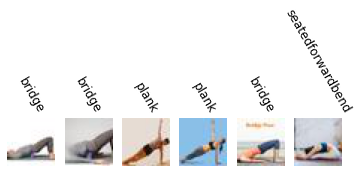

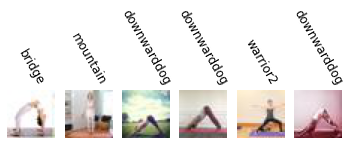

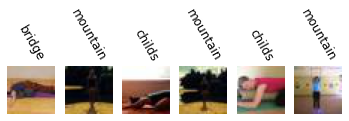

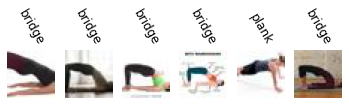

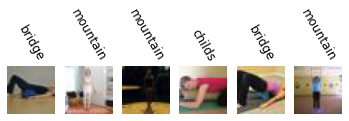

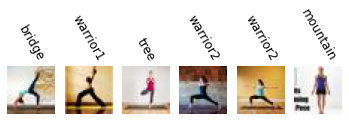

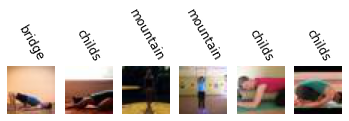

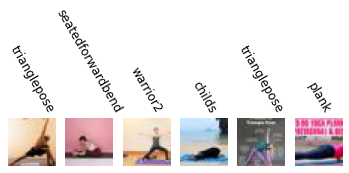

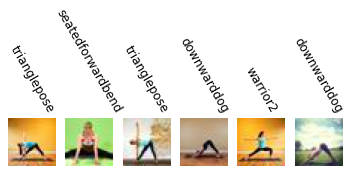

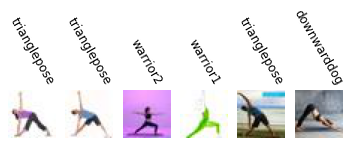

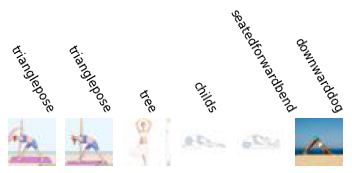

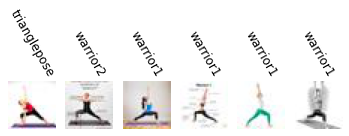

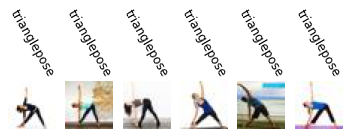

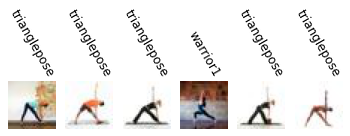

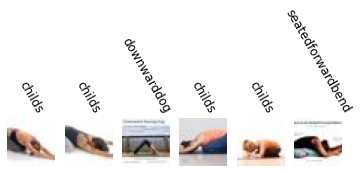

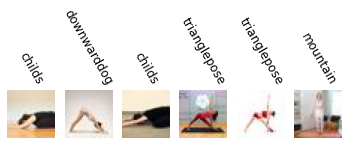

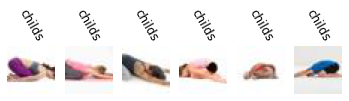

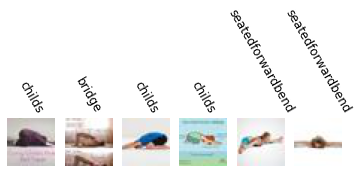

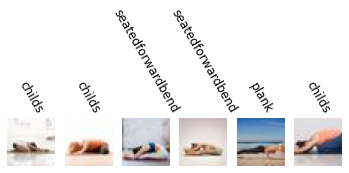

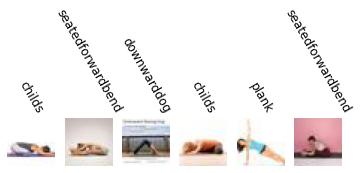

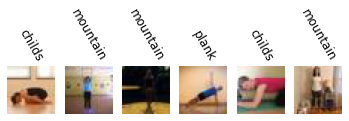

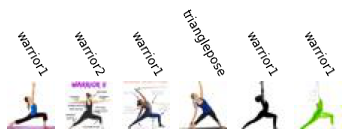

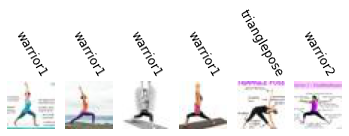

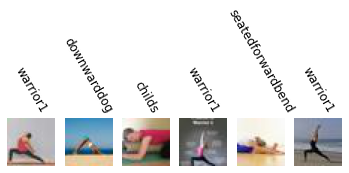

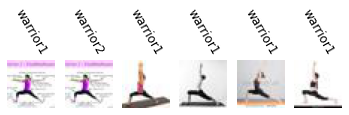

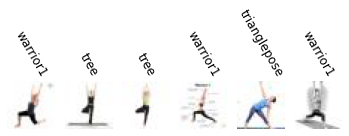

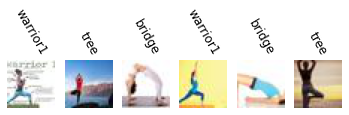

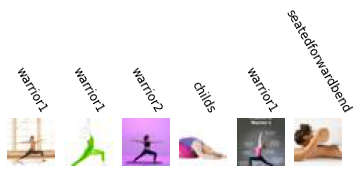

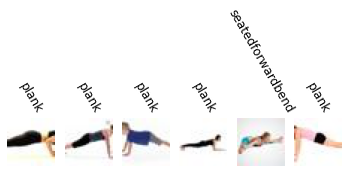

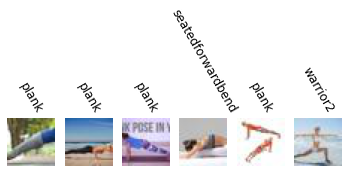

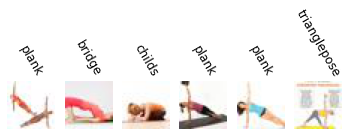

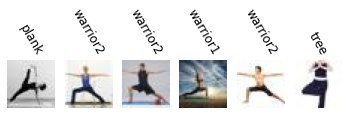

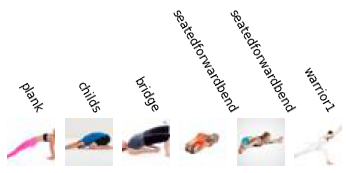

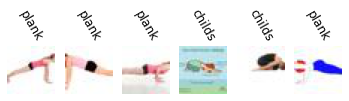

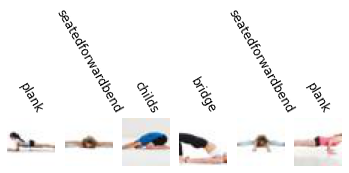

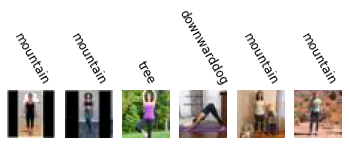

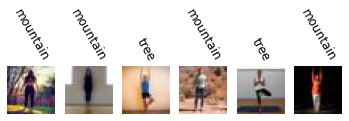

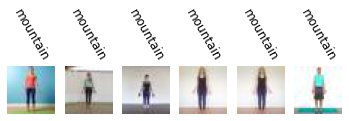

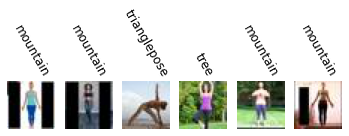

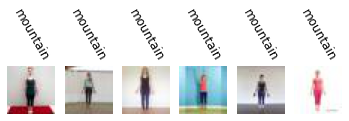

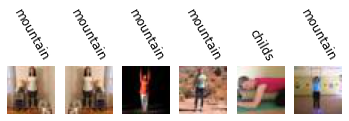

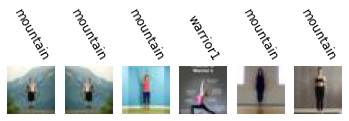

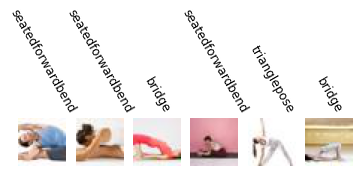

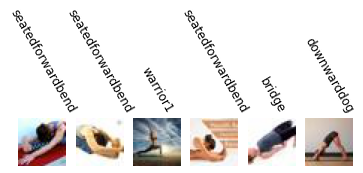

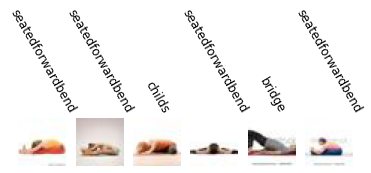

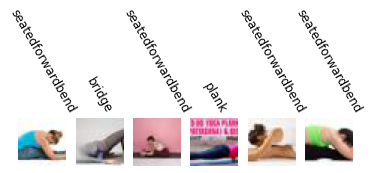

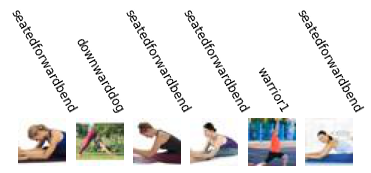

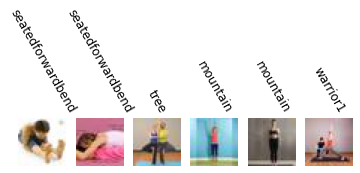

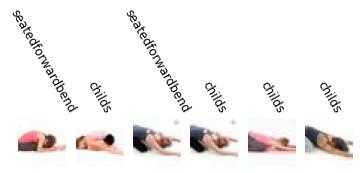

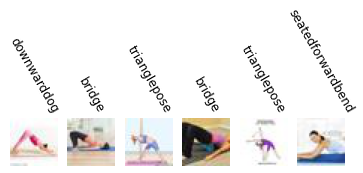

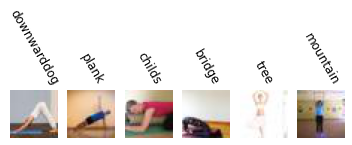

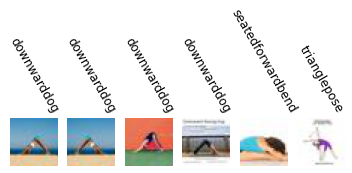

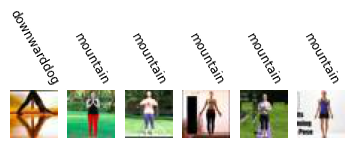

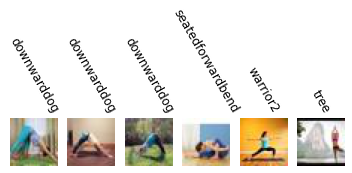

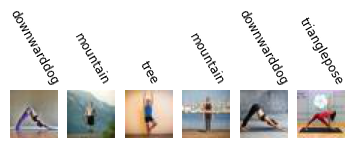

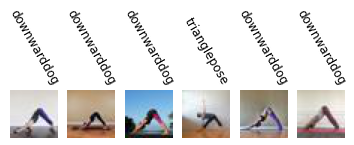

In [188]:
import re

for test_sample in neightbour_dictionary:
    fig, axes = plt.subplots(1, 6)
    im = plt.imread(test_sample)
    test_title = re.findall(r'test/(.*?)/', test_sample)
    axes[0].imshow(im)
    axes[0].axis('off')
    axes[0].set_title(test_title[0], rotation=300)
    for i in range(len(neightbour_dictionary[test_sample])):
        im = plt.imread(neightbour_dictionary[test_sample][i])
        train_title = re.findall(r'train/(.*?)/', neightbour_dictionary[test_sample][i])
        axes[i+1].imshow(im)
        axes[i+1].axis('off')
        axes[i+1].set_title(train_title[0], rotation=300)
    plt.axis('off')
    plt.show()